In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
crypto_currency = "BTC"
against_currency = "USD"

In [ ]:
start = dt.datetime(2016,1,1)
end = dt.datetime.now()

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2700,2022-02-07,42406.781250,44401.863281,41748.156250,43840.285156,43840.285156,28641855926
2701,2022-02-08,43854.652344,45293.867188,42807.835938,44118.445313,44118.445313,33079398868
2702,2022-02-09,44096.703125,44727.800781,43232.968750,44338.796875,44338.796875,23245887300
2703,2022-02-10,44347.800781,45661.171875,43402.808594,43565.113281,43565.113281,32142048537


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [ ]:
prediction_Days = 120

In [ ]:
X_train , Y_train = [], []
 
for x in range(prediction_Days , len(scaled_data)):
  X_train.append(scaled_data[x-prediction_Days:x,0])
  Y_train.append(scaled_data[x,0])

X_train , Y_train = np.array(X_train) , np.array(Y_train)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50 ))
model.add(Dropout(0.2))
model.add(Dense(units =1 ))

In [ ]:
model.compile(optimizer= 'adam', loss ="mean_squared_error", metrics = "accuracy")
model.fit(X_train, Y_train, epochs = 25, batch_size =32)

In [ ]:
test_data = pd.read_csv("test.csv")

In [ ]:
test_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095
...,...,...,...,...,...,...,...
768,2022-02-07,42406.781250,44401.863281,41748.156250,43840.285156,43840.285156,28641855926
769,2022-02-08,43854.652344,45293.867188,42807.835938,44118.445313,44118.445313,33079398868
770,2022-02-09,44096.703125,44727.800781,43232.968750,44338.796875,44338.796875,23245887300
771,2022-02-10,44347.800781,45661.171875,43402.808594,43565.113281,43565.113281,32142048537


In [ ]:
actual_prices = test_data['Close'].values


In [ ]:
total_dataset = pd.concat( (data['Close'] , test_data['Close']) , axis =0 )


In [ ]:
model_inputs = total_dataset[len(total_dataset)- len(test_data) - prediction_Days:].values
model_inputs= model_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(model_inputs)

In [ ]:
X_test = []

for x in range(prediction_Days, len(model_inputs)):
  X_test.append(model_inputs[x- prediction_Days:x,0])

In [ ]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predictions_prices  = model.predict(X_test)
predictions_prices = scaler.inverse_transform(predictions_prices)

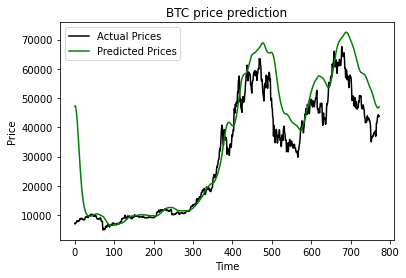

In [ ]:
plt.plot(actual_prices, color ='black', label ="Actual Prices")
plt.plot(predictions_prices, color = "green", label ="Predicted Prices")
plt.title("BTC price prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc= 'upper left')
plt.show()